In [1]:
from pathlib import Path
from neuralop.data import load_darcy_pt

# Download the data 

In [18]:
%%bash 
folder="/data/darcy_flow"
[ -d foo ] || mkdir -p ${folder}
cd ${folder}
gdown 1zoL-0gj-pULZsYqFd1WQvSPjQgmZkE_Z
unzip darcy_small.zip

Downloading...
From: https://drive.google.com/uc?id=1zoL-0gj-pULZsYqFd1WQvSPjQgmZkE_Z
To: /data/darcy_test/darcy_small.zip
100%|██████████| 748M/748M [00:10<00:00, 69.3MB/s] 


Archive:  darcy_small.zip
  inflating: darcy_train_128.pt      
  inflating: darcy_train_64.pt       
  inflating: darcy_train_32.pt       
  inflating: darcy_test_128.pt       
  inflating: darcy_test_64.pt        
  inflating: darcy_test_32.pt        


# Load the data 

In [6]:
data_path="/data/darcy_flow"

In [7]:
train_loader, test_loaders, output_encoder = load_darcy_pt(data_path, n_train=100, n_tests=[10], 
              batch_size=3, test_batch_sizes=[3],
              test_resolutions=[128], train_resolution=128)

UnitGaussianNormalizer init on 100, reducing over [0, 1, 2, 3], samples of shape [1, 128, 128].
   Mean and std of shape torch.Size([1, 1, 1]), eps=1e-05


In [8]:
train_dataset = train_loader.dataset

# Visualizing the data  

The data is stored in a dictionary

In [9]:
data = train_dataset[0]
x = data['x']
y = data['y']

In [10]:
x.shape

torch.Size([3, 128, 128])

`x` is of shape (3, height, width). 

This is because, in addition to the binary input, we appended a positional encoding, so the model knows the location of each pixel.

Let's check the actual data:

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

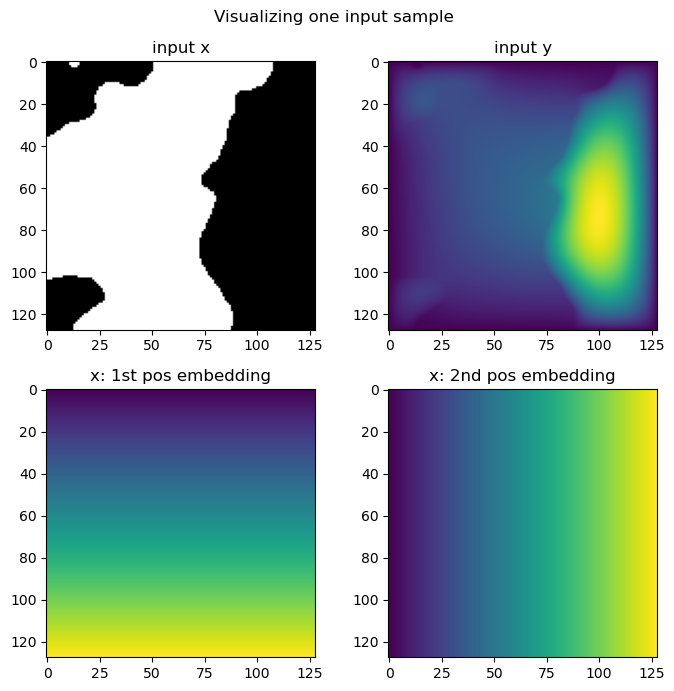

In [10]:
# Which sample to view
index = 10

data = train_dataset[index]
x = data['x']
y = data['y']
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(x[0], cmap='gray')
ax.set_title('input x')
ax = fig.add_subplot(2, 2, 2)
ax.imshow(y.squeeze())
ax.set_title('input y')
ax = fig.add_subplot(2, 2, 3)
ax.imshow(x[1])
ax.set_title('x: 1st pos embedding')
ax = fig.add_subplot(2, 2, 4)
ax.imshow(x[2])
ax.set_title('x: 2nd pos embedding')
fig.suptitle('Visualizing one input sample', y=0.98)
plt.tight_layout()
fig.show()